In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit

In [2]:
##read data - biomass, Virginia LTER
df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Virginia_ChristianBlum.csv', skiprows=21)
df = df[df['speciesName'] == 'Spartina alterniflora']
df = df[['EOYBYear', 'collectDate', 'marshName', 'siteName', 'marshRegion', 'monitoringPurpose', 'Transect', 'Replicate', 'speciesName', 'liveMass', 'deadMass', 'totalMass', 'latitude', 'longitude']]
df['collectDate'] = pd.to_datetime(df['collectDate'])

##water quality dataset, Virginia LTER
df_wq = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Virginia_WQ.csv', skiprows=21)
df_wq['measureDate'] = pd.to_datetime(df_wq['measureDate'])

max(df['liveMass'])

#df
##IMPORTANT NOTE: 2017 data does not distinguish live from dead biomass due to a freezer failure

193.96

In [3]:
df_wq['Year'] = pd.DatetimeIndex(df_wq['measureDate']).year
new_dfwq = df_wq.groupby('Year', as_index = False).mean()
no3 = new_dfwq[['Year', 'no3_no2']]
no3 = no3[no3['no3_no2'] < 80] #removed one year where there appears to be a massive outlier 
no3


,Year,no3_no2
0,1992,2.601233
1,1993,3.808109
2,1994,2.663925
3,1995,1.603958
4,1996,5.986033
5,1997,3.406682
6,1998,5.860571
7,1999,3.152909
8,2000,3.116027
9,2001,2.273680


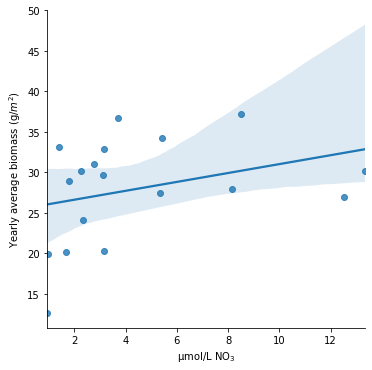

In [4]:
##summary statistics
df_means = df.groupby('EOYBYear', as_index = False).mean()
df_sem = df.groupby('EOYBYear').sem()

df_means['Year'] = df_means['EOYBYear']
#df.groupby('EOYBYear').aggregate([np.mean, np.size])
df_means ##'average lat/long' useless

list(df_means)
mn_mass = df_means[['Year', 'liveMass']]
mn_mass
xxx = pd.merge(mn_mass, no3, on='Year')
xxx

g = sns.lmplot(x = 'no3_no2', y = 'liveMass', ci = 95, data = xxx)
g.set_axis_labels("µmol/L NO$_3$", "Yearly average biomass (g/$m^2$)")

##nitrate/nitrite units: micromols per Liter

In [5]:
result = sm.ols(formula="liveMass ~ no3_no2", data = xxx).fit()
print(result.params)
print(result.summary()) ##no sig relationship - due to small sample size?

xxx['liveMass'].corr(xxx['no3_no2'], method = 'pearson')

Intercept    25.533419
no3_no2       0.549470
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               liveMass   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.824
Date:                Mon, 03 May 2021   Prob (F-statistic):              0.196
Time:                        09:32:13   Log-Likelihood:                -57.701
No. Observations:                  18   AIC:                             119.4
Df Residuals:                      16   BIC:                             121.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/Users/asariversjulien/PhD/venv/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.3199222514980952